In [67]:
# Basic Libraries
import pandas as pd

In [68]:
col_names = ['id','satisfaction_v2','Gender','Customer Type',
'Age','Type of Travel','Class','Flight Distance',
'Seat comfort','Departure/Arrival time convenient','Food and drink','Gate location','Inflight wifi service',
'Inflight entertainment','Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling',
'Checkin service','Cleanliness','Online boarding','Departure Delay in Minutes','Arrival Delay in Minutes']
# load dataset, remove header
pima = pd.read_csv("satisfaction.csv", header=1, names=col_names)
pima.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
1,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
2,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
3,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
4,100744,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,...,2,2,5,4,5,5,4,2,0,0.0


In [69]:
#pima.loc[pima['satisfaction_v2'] == 'satisfied', 'satisfaction_v2'] = 1
#pima.loc[pima['satisfaction_v2'] == 'neutral or dissatisfied', 'satisfaction_v2'] = 0
#pima['satisfaction_v2'].head #check value update success

In [70]:
# list of columns ['Seat comfort','Departure/Arrival time convenient','Food and drink',
#'Inflight wifi service','Inflight entertainment','On-board service','Leg room service',
#'Checkin service','Cleanliness']
feature_cols = ['Seat comfort','Departure/Arrival time convenient','Food and drink',
'Inflight wifi service','Inflight entertainment','On-board service','Leg room service',
'Checkin service','Cleanliness']

X = pima[feature_cols] # Features
y = pima.satisfaction_v2 # Target variable

In [71]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [72]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=500) # increase the limit else will get warning

# fit the model with data
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

In [73]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 8878,  2842],
       [ 2432, 11824]], dtype=int64)

In [74]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

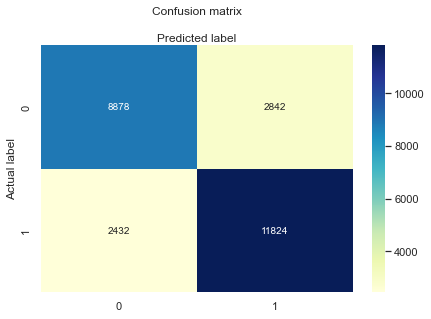

In [75]:
class_names = [0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

###### For the Confustion matrix 

blue color area are actual prediction

Yellow are incorrect prediction

In [76]:
#pos_label='satisfied' will take satisfied as positive else will take 1 as default
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred,pos_label='satisfied'))
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='satisfied'))

Accuracy: 0.7969664305512781
Precision: 0.806218464475658
Recall: 0.8294051627384961


1. classification rate of ~80%, consider good accuracy.
2. precision also ~80%, based on the regression model, it has ~80% accuracy predicting that the customer is satisfied
3. If there are customer who are satisfied in the test set, the logistic regression model can identify ~82% of the time.

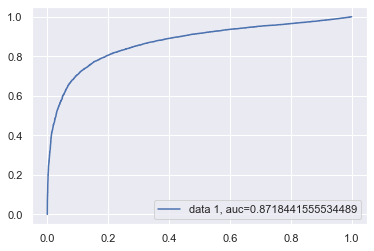

In [77]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label='satisfied')
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Receiver Operating Characteristic(ROC) Curve

A plot for the true positive rate against the false positive rate.

AUC score of 0.87. Consider good. As 1 represents perfect classifier and 0.5 represents a worthless classifier.